In [1]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import numpy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# fix random seed for reproducibility
numpy.random.seed(2)

C:\Users\BHARGAV\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import pandas as pd
data = pd.read_csv('ENB2012_data.csv')



In [3]:
data.shape

(768, 12)

In [4]:
#X_lables = []
X = data[data.columns[0:8]]


In [5]:
X.shape

(768, 8)

In [6]:
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.74,686.0,245.0,220.5,3.5,4,0.0,0
1,0.74,686.0,245.0,220.5,3.5,2,0.0,0
2,0.74,686.0,245.0,220.5,3.5,5,0.0,0
3,0.74,686.0,245.0,220.5,3.5,3,0.0,0
4,0.71,710.5,269.5,220.5,3.5,2,0.0,0


In [58]:
#label = ['Overall load']
#y = data[data.columns[8:10]]
y1 = data[data.columns[8:9]]
y2 = data[data.columns[9:10]]

In [59]:
y1.head()

,Y1
0,6.01
1,6.07
2,6.04
3,6.05
4,6.37


In [60]:
y2.head()

,Y2
0,10.94
1,10.90
2,11.17
3,11.19
4,11.27


# Deep Learning for Heating Load

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y1)
X_train.shape

(576, 8)

In [85]:
model = Sequential()
model.add(Dense(20, input_dim=8, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(5, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(1, kernel_initializer='normal'))

In [86]:
model.compile(loss='mse', optimizer='adam' , metrics = ['mse'])

In [87]:
model.fit(X_train, y_train, epochs=200, batch_size=20)

Epoch 1/200
576/576 [==============================] - 1s 3ms/step - loss: 591.1685 - mean_squared_error: 591.1685
Epoch 2/200
576/576 [==============================] - 0s 338us/step - loss: 559.3910 - mean_squared_error: 559.3910
Epoch 3/200
576/576 [==============================] - 0s 354us/step - loss: 382.1879 - mean_squared_error: 382.1879
Epoch 4/200
576/576 [==============================] - 0s 341us/step - loss: 147.7178 - mean_squared_error: 147.7178
Epoch 5/200
576/576 [==============================] - 0s 283us/step - loss: 137.3369 - mean_squared_error: 137.3369
Epoch 6/200
576/576 [==============================] - 0s 321us/step - loss: 132.1344 - mean_squared_error: 132.1344
Epoch 7/200
576/576 [==============================] - 0s 321us/step - loss: 129.5638 - mean_squared_error: 129.5638
Epoch 8/200
576/576 [==============================] - 0s 321us/step - loss: 127.8557 - mean_squared_error: 127.8557
Epoch 9/200
576/576 [==============================] - 0s 348us/st

576/576 [==============================] - 0s 120us/step - loss: 15.2192 - mean_squared_error: 15.2192
Epoch 141/200
576/576 [==============================] - 0s 166us/step - loss: 15.2753 - mean_squared_error: 15.2753
Epoch 142/200
576/576 [==============================] - 0s 114us/step - loss: 15.2033 - mean_squared_error: 15.2033
Epoch 143/200
576/576 [==============================] - 0s 119us/step - loss: 15.0915 - mean_squared_error: 15.0915
Epoch 144/200
576/576 [==============================] - 0s 119us/step - loss: 15.0256 - mean_squared_error: 15.0256
Epoch 145/200
576/576 [==============================] - 0s 146us/step - loss: 15.0917 - mean_squared_error: 15.0917
Epoch 146/200
576/576 [==============================] - 0s 147us/step - loss: 15.1741 - mean_squared_error: 15.1741
Epoch 147/200
576/576 [==============================] - 0s 146us/step - loss: 15.6710 - mean_squared_error: 15.6710
Epoch 148/200
576/576 [==============================] - 0s 109us/step - loss:

In [88]:
from sklearn.metrics import r2_score

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print('Train r2: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test r2: {:.2f}'.format(r2_score(y_test, y_test_predict)))

Train r2: 0.86
Test r2: 0.85


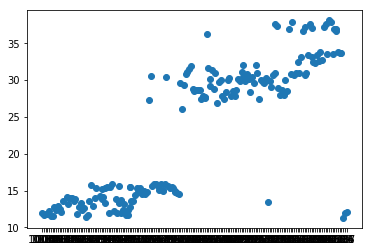

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test, y_test_predict)


# Deep Learning for Cooling Load

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y2)
X_train.shape

(576, 8)

In [76]:
model = Sequential()
model.add(Dense(20, input_dim=8, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(5, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(1, kernel_initializer='normal'))

In [77]:
model.compile(loss='mse', optimizer='adam' , metrics = ['mse'])

In [78]:
model.fit(X_train, y_train, epochs=200, batch_size=20)

Epoch 1/200
576/576 [==============================] - 1s 2ms/step - loss: 665.5113 - mean_squared_error: 665.5113
Epoch 2/200
576/576 [==============================] - 0s 321us/step - loss: 584.4373 - mean_squared_error: 584.4373
Epoch 3/200
576/576 [==============================] - 0s 348us/step - loss: 245.1662 - mean_squared_error: 245.1662
Epoch 4/200
576/576 [==============================] - 0s 321us/step - loss: 135.6127 - mean_squared_error: 135.6127
Epoch 5/200
576/576 [==============================] - 0s 348us/step - loss: 125.4566 - mean_squared_error: 125.4566
Epoch 6/200
576/576 [==============================] - 0s 348us/step - loss: 123.6460 - mean_squared_error: 123.64600s - loss: 123.9289 - mean_squared_error: 123.92
Epoch 7/200
576/576 [==============================] - 0s 348us/step - loss: 120.6124 - mean_squared_error: 120.6124
Epoch 8/200
576/576 [==============================] - 0s 348us/step - loss: 117.1041 - mean_squared_error: 117.1041
Epoch 9/200
576/57

576/576 [==============================] - 0s 81us/step - loss: 19.5528 - mean_squared_error: 19.5528
Epoch 142/200
576/576 [==============================] - 0s 65us/step - loss: 19.4426 - mean_squared_error: 19.4426
Epoch 143/200
576/576 [==============================] - 0s 81us/step - loss: 19.4814 - mean_squared_error: 19.4814
Epoch 144/200
576/576 [==============================] - 0s 93us/step - loss: 19.6503 - mean_squared_error: 19.6503
Epoch 145/200
576/576 [==============================] - 0s 109us/step - loss: 19.1542 - mean_squared_error: 19.1542
Epoch 146/200
576/576 [==============================] - 0s 93us/step - loss: 20.3790 - mean_squared_error: 20.3790
Epoch 147/200
576/576 [==============================] - 0s 81us/step - loss: 19.1204 - mean_squared_error: 19.1204
Epoch 148/200
576/576 [==============================] - 0s 66us/step - loss: 18.9089 - mean_squared_error: 18.9089
Epoch 149/200
576/576 [==============================] - 0s 81us/step - loss: 18.9640

In [79]:
from sklearn.metrics import r2_score

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print('Train r2: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test r2: {:.2f}'.format(r2_score(y_test, y_test_predict)))

Train r2: 0.83
Test r2: 0.80


In [80]:
y_test_predict

array([[27.311596 ],
       [16.143345 ],
       [30.90388  ],
       [31.339357 ],
       [14.689349 ],
       [15.474905 ],
       [32.300163 ],
       [32.06495  ],
       [31.665031 ],
       [30.782557 ],
       [31.586082 ],
       [27.394878 ],
       [29.404184 ],
       [19.994947 ],
       [39.073193 ],
       [16.244759 ],
       [27.55216  ],
       [32.5364   ],
       [14.863012 ],
       [32.97649  ],
       [14.802502 ],
       [30.800074 ],
       [15.155145 ],
       [19.680784 ],
       [30.0801   ],
       [14.293951 ],
       [32.178448 ],
       [15.115946 ],
       [31.472185 ],
       [30.11606  ],
       [32.77121  ],
       [32.348164 ],
       [34.041096 ],
       [33.098206 ],
       [39.908195 ],
       [29.765932 ],
       [33.12876  ],
       [14.642208 ],
       [16.194622 ],
       [34.114017 ],
       [34.283337 ],
       [15.691287 ],
       [14.776663 ],
       [32.578365 ],
       [33.96917  ],
       [13.975158 ],
       [28.690102 ],
       [16.46

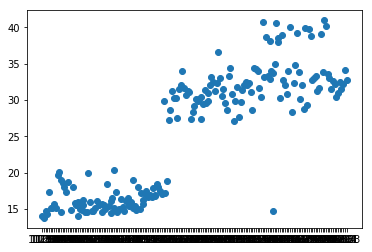

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test, y_test_predict)


# Deep Learning Classification

In [90]:
y3 = data[data.columns[11:12]] #total load is divided into three classes [1,2,3]
y3.head()

,Class
0,1
1,1
2,1
3,1
4,1


In [92]:
encoder = LabelEncoder()
encoder.fit(y3)
encoded_Y = encoder.transform(y3)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,dummy_y)
X_train.shape

(576, 8)

In [98]:
y_train.shape

(576, 3)

In [99]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu',kernel_initializer='normal'))
model.add(Dense(8, activation='relu', kernel_initializer='normal'))
model.add(Dense(3, activation='sigmoid', kernel_initializer='normal'))

In [100]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [101]:
model.fit(X_train, y_train, epochs=200, batch_size=20)

Epoch 1/200
576/576 [==============================] - 2s 3ms/step - loss: 0.6730 - acc: 0.6198
Epoch 2/200
576/576 [==============================] - 0s 375us/step - loss: 0.6253 - acc: 0.6667
Epoch 3/200
576/576 [==============================] - 0s 349us/step - loss: 0.6069 - acc: 0.6667
Epoch 4/200
576/576 [==============================] - 0s 348us/step - loss: 0.5854 - acc: 0.6962
Epoch 5/200
576/576 [==============================] - 0s 402us/step - loss: 0.5477 - acc: 0.7101
Epoch 6/200
576/576 [==============================] - 0s 348us/step - loss: 0.5017 - acc: 0.7442
Epoch 7/200
576/576 [==============================] - 0s 375us/step - loss: 0.4695 - acc: 0.7766
Epoch 8/200
576/576 [==============================] - 0s 321us/step - loss: 0.4448 - acc: 0.7818
Epoch 9/200
576/576 [==============================] - 0s 379us/step - loss: 0.4321 - acc: 0.7847
Epoch 10/200
576/576 [==============================] - 0s 344us/step - loss: 0.4246 - acc: 0.7789
Epoch 11/200
576/576 

576/576 [==============================] - 0s 147us/step - loss: 0.3746 - acc: 0.8061
Epoch 166/200
576/576 [==============================] - 0s 174us/step - loss: 0.3738 - acc: 0.8015
Epoch 167/200
576/576 [==============================] - 0s 147us/step - loss: 0.3816 - acc: 0.8003
Epoch 168/200
576/576 [==============================] - 0s 147us/step - loss: 0.3765 - acc: 0.7986
Epoch 169/200
576/576 [==============================] - 0s 174us/step - loss: 0.3803 - acc: 0.8044
Epoch 170/200
576/576 [==============================] - 0s 147us/step - loss: 0.3742 - acc: 0.8090
Epoch 171/200
576/576 [==============================] - 0s 174us/step - loss: 0.3734 - acc: 0.8038
Epoch 172/200
576/576 [==============================] - 0s 174us/step - loss: 0.3764 - acc: 0.8056
Epoch 173/200
576/576 [==============================] - 0s 167us/step - loss: 0.3747 - acc: 0.8073
Epoch 174/200
576/576 [==============================] - 0s 140us/step - loss: 0.3767 - acc: 0.7992
Epoch 175/200


In [103]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

192/192 [==============================] - 0s 2ms/step

acc: 82.12%


# Regressions for Heating Load

In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y1)
X_train.shape

(576, 8)

# Decision Tree

In [186]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=123)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [187]:
from sklearn.metrics import r2_score
print('Test r2: {:.2f}'.format(r2_score(y_test, y_pred)))

Test r2: 1.00


In [188]:
from sklearn.model_selection import GridSearchCV
paramgrid = {'max_depth' : [1, 5, 10],
              'min_samples_split': [10, 15, 20],
              'min_samples_leaf' : [1,5,10]}

In [189]:
dt_new = GridSearchCV(dt, paramgrid, cv=10)
dt_new.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=123, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 5, 10], 'min_samples_split': [10, 15, 20], 'min_samples_leaf': [1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [190]:
dt_new.best_params_

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 15}

In [191]:
y_pred_ = dt_new.best_estimator_.predict(X_test)

In [192]:
print('Test r2: {:.4f}'.format(r2_score(y_test, y_pred_)))
#dt_best_new = dt_new.best_estimator_
#R2_after_dt= evaluate(dt_best_, X_test, y_test)

Test r2: 0.9946


# Ada Boosting

In [193]:
from sklearn.ensemble import AdaBoostRegressor

adaboost_clf = AdaBoostRegressor(base_estimator = dt_new.best_estimator_, learning_rate = 0.5)
adaboost_clf.fit(X_train,y_train)
y_pred_ = adaboost_clf.predict(X_test)

C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [194]:
print('Test r2: {:.4f}'.format(r2_score(y_test, y_pred_)))

Test r2: 0.9971


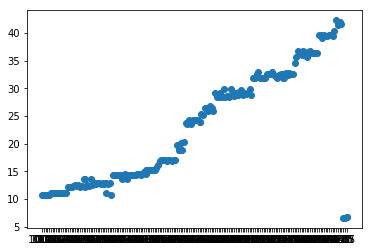

In [195]:
plt.scatter(y_test, y_pred_)

# Random Forest

In [196]:
#random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=123, n_estimators = 50)
rf.fit(X_train, y_train)
y_pred1 = rf.predict(X_test)

C:\Users\BHARGAV\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [197]:
print('Test r2: {:.4f}'.format(r2_score(y_test, y_pred1)))

Test r2: 0.9969


In [198]:
from sklearn.model_selection import GridSearchCV
paramgrid = {'max_depth' : [3,5,7,9],
              'min_samples_split': [10,15,20],
              'min_samples_leaf' : [2,4,6]}
              



rf_new = GridSearchCV(rf, paramgrid, cv=10)


rf_new.fit(X_train, y_train)

C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vec

C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vec

C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vec

C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vec

C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vec

C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vec

C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vec

C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vec

C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vec

C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vec

C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vec

C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vec

C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vec

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=123, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 5, 7, 9], 'min_samples_split': [10, 15, 20], 'min_samples_leaf': [2, 4, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [199]:
rf_new.best_params_

{'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 10}

In [200]:
y_pred1_ = rf_new.best_estimator_.predict(X_test)

In [201]:
print('Test r2: {:.4f}'.format(r2_score(y_test, y_pred1_)))

Test r2: 0.9946


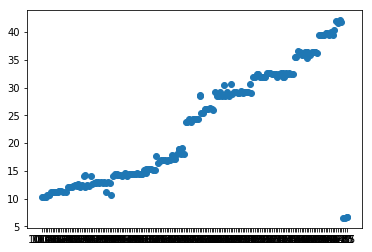

In [202]:
plt.scatter(y_test, y_pred1_)

# Linear Regression

In [203]:
#linear regression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train, y_train)
y_pred2 = linreg.predict(X_test)

In [204]:
print('Test r2: {:.2f}'.format(r2_score(y_test, y_pred2)))

Test r2: 0.92


# Ada Boosting

In [205]:
adaboost_clf = AdaBoostRegressor(base_estimator = linreg, learning_rate = 0.5)
adaboost_clf.fit(X_train,y_train)
y_pred2_ = adaboost_clf.predict(X_test)

C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [206]:
print('Test r2: {:.2f}'.format(r2_score(y_test, y_pred2_)))

Test r2: 0.92


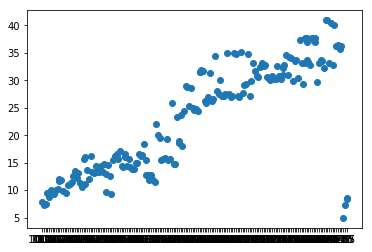

In [207]:
plt.scatter(y_test, y_pred2_)

# Ridge Regression

In [208]:
#Ridge 
from sklearn.linear_model import Ridge
ridge = Ridge()
param_grid = {'alpha':[0.001, 0.01, 1, 5, 10, 50, 100]}
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 1, 5, 10, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [209]:
print('grid search best parameters:(w) {}'.format(grid_search.best_params_))

grid search best parameters:(w) {'alpha': 0.001}


In [210]:
linridge = Ridge(alpha = 0.001).fit(X_train, y_train)

In [211]:
y_pred3 = linridge.predict(X_test)

In [212]:
print('Test r2: {:.2f}'.format(r2_score(y_test, y_pred3)))

Test r2: 0.92


# Ada Boosting

In [213]:
adaboost_clf = AdaBoostRegressor(base_estimator = linridge, learning_rate = 0.5)
adaboost_clf.fit(X_train,y_train)
y_pred3_ = adaboost_clf.predict(X_test)

C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [214]:
print('Test r2: {:.2f}'.format(r2_score(y_test, y_pred3_)))

Test r2: 0.92


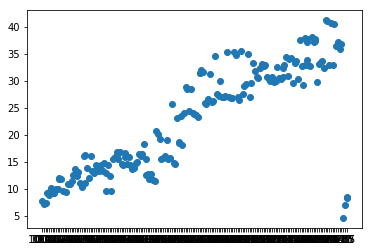

In [215]:
plt.scatter(y_test, y_pred3_)

# Lasso Regression

In [216]:
#Lasso
from sklearn.linear_model import Lasso
lasso = Lasso(max_iter=10000)
param_grid={'alpha':[0.001, 0.01, 1, 10, 100]}

grid_search = GridSearchCV(lasso, param_grid, cv = 5)
grid_search.fit(X_train, y_train)
print('grid search best parameters:(w) {}'.format(grid_search.best_params_))

grid search best parameters:(w) {'alpha': 0.001}


In [217]:
linlasso = Lasso(0.001, max_iter=10000).fit(X_train, y_train)

In [218]:
y_pred4 = linlasso.predict(X_test)

In [219]:
print('Test r2: {:.2f}'.format(r2_score(y_test, y_pred4)))

Test r2: 0.92


# Ada Boosting

In [220]:
adaboost_clf = AdaBoostRegressor(base_estimator = linlasso, learning_rate = 0.5)
adaboost_clf.fit(X_train,y_train)
y_pred4_ = adaboost_clf.predict(X_test)

C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [221]:
print('Test r2: {:.2f}'.format(r2_score(y_test, y_pred4_)))

Test r2: 0.92


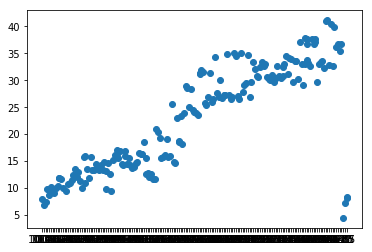

In [222]:
plt.scatter(y_test, y_pred4_)

# Regressions for Cooling Load

# Test Train Split

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y2)
X_train.shape

(576, 8)

# Decision Tree

In [148]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=123)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [149]:
from sklearn.metrics import r2_score
print('Test r2: {:.2f}'.format(r2_score(y_test, y_pred)))

Test r2: 0.94


In [150]:
from sklearn.model_selection import GridSearchCV
paramgrid = {'max_depth' : [1, 5, 10],
              'min_samples_split': [10, 15, 20],
              'min_samples_leaf' : [1,5,10]}

In [151]:
dt_new = GridSearchCV(dt, paramgrid, cv=10)
dt_new.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=123, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 5, 10], 'min_samples_split': [10, 15, 20], 'min_samples_leaf': [1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [152]:
dt_new.best_params_

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 15}

In [153]:
y_pred_ = dt_new.best_estimator_.predict(X_test)

In [154]:
print('Test r2: {:.4f}'.format(r2_score(y_test, y_pred_)))

Test r2: 0.9552


# Ada Boosting

In [155]:
adaboost_clf = AdaBoostRegressor(base_estimator = dt_new.best_estimator_, learning_rate = 0.5)
adaboost_clf.fit(X_train,y_train)
y_pred_ = adaboost_clf.predict(X_test)

C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [156]:
print('Test r2: {:.4f}'.format(r2_score(y_test, y_pred_)))

Test r2: 0.9655


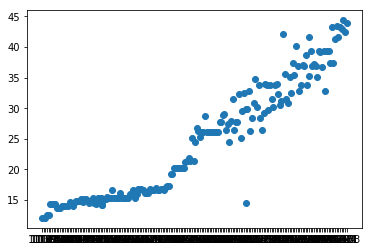

In [184]:
plt.scatter(y_test, y_pred_)

# Random Forest

In [ ]:
#random forest

In [157]:
rf = RandomForestRegressor(random_state=123, n_estimators = 50)
rf.fit(X_train, y_train)
y_pred1 = rf.predict(X_test)

C:\Users\BHARGAV\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [158]:
print('Test r2: {:.4f}'.format(r2_score(y_test, y_pred1)))

Test r2: 0.9652


In [159]:
from sklearn.model_selection import GridSearchCV
paramgrid = {'max_depth' : [3,5,7,9],
              'min_samples_split': [10,15,20],
              'min_samples_leaf' : [2,4,6]}
              



rf_new = GridSearchCV(rf, paramgrid, cv=10)


rf_new.fit(X_train, y_train)

C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vec

C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vec

C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vec

C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vec

C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vec

C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vec

C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vec

C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vec

C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vec

C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vec

C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vec

C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vec

C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vec

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=123, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 5, 7, 9], 'min_samples_split': [10, 15, 20], 'min_samples_leaf': [2, 4, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [160]:
rf_new.best_params_

{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10}

In [161]:
y_pred1_ = rf_new.best_estimator_.predict(X_test)

In [162]:
print('Test r2: {:.4f}'.format(r2_score(y_test, y_pred1_)))

Test r2: 0.9581


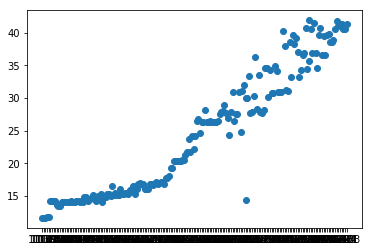

In [183]:
plt.scatter(y_test, y_pred1_)

# Linear Regression

In [163]:
#linear regression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train, y_train)
y_pred2 = linreg.predict(X_test)

In [164]:
print('Test r2: {:.2f}'.format(r2_score(y_test, y_pred2)))

Test r2: 0.87


# Ada Boosting

In [165]:
adaboost_clf = AdaBoostRegressor(base_estimator = linreg, learning_rate = 0.5)
adaboost_clf.fit(X_train,y_train)
y_pred2_ = adaboost_clf.predict(X_test)

C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [166]:
print('Test r2: {:.2f}'.format(r2_score(y_test, y_pred2_)))

Test r2: 0.88


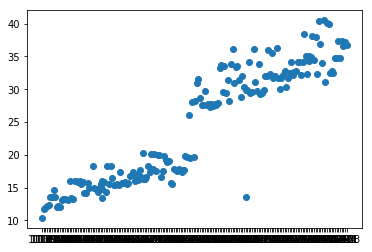

In [182]:
plt.scatter(y_test, y_pred2_)

# Ridge Regression

In [167]:
#Ridge 
from sklearn.linear_model import Ridge
ridge = Ridge()
param_grid = {'alpha':[0.001, 0.01, 1, 5, 10, 50, 100]}
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 1, 5, 10, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [168]:
print('grid search best parameters:(w) {}'.format(grid_search.best_params_))

grid search best parameters:(w) {'alpha': 0.001}


In [169]:
linridge = Ridge(alpha = 0.001).fit(X_train, y_train)

In [170]:
y_pred3 = linridge.predict(X_test)

In [171]:
print('Test r2: {:.2f}'.format(r2_score(y_test, y_pred3)))

Test r2: 0.87


# Ada Boosting

In [172]:
adaboost_clf = AdaBoostRegressor(base_estimator = linridge, learning_rate = 0.5)
adaboost_clf.fit(X_train,y_train)
y_pred3_ = adaboost_clf.predict(X_test)

C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [173]:
print('Test r2: {:.2f}'.format(r2_score(y_test, y_pred3_)))

Test r2: 0.88


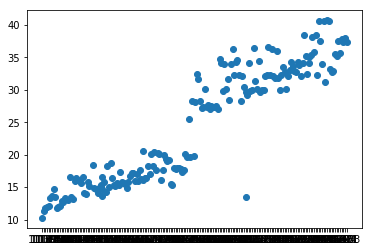

In [181]:

plt.scatter(y_test, y_pred3_)

# Lasso Regression

In [174]:
#Lasso
from sklearn.linear_model import Lasso
lasso = Lasso(max_iter=10000)
param_grid={'alpha':[0.001, 0.01, 1, 10, 100]}

grid_search = GridSearchCV(lasso, param_grid, cv = 5)
grid_search.fit(X_train, y_train)
print('grid search best parameters:(w) {}'.format(grid_search.best_params_))

grid search best parameters:(w) {'alpha': 0.001}


In [175]:
linlasso = Lasso(0.001, max_iter=10000).fit(X_train, y_train)

In [176]:
y_pred4 = linlasso.predict(X_test)

In [177]:
print('Test r2: {:.2f}'.format(r2_score(y_test, y_pred4)))

Test r2: 0.87


# Ada Boosting

In [178]:
adaboost_clf = AdaBoostRegressor(base_estimator = linlasso, learning_rate = 0.5)
adaboost_clf.fit(X_train,y_train)
y_pred4_ = adaboost_clf.predict(X_test)

C:\Users\BHARGAV\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [179]:
print('Test r2: {:.2f}'.format(r2_score(y_test, y_pred4_)))

Test r2: 0.88


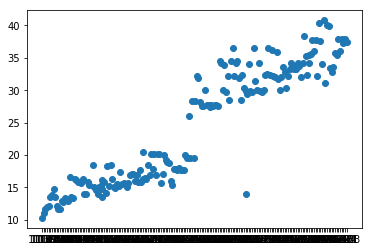

In [180]:
%matplotlib inline
plt.scatter(y_test, y_pred4_)